In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data["Gender"] = data.Gender.map({"Male":1,"Female":0})

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


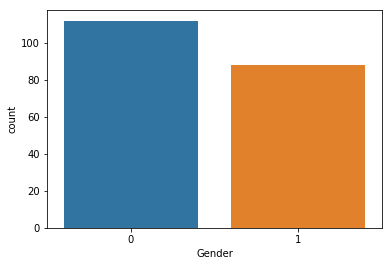

In [8]:
sns.countplot(data=data, x='Gender')

In [9]:
data["Gender"].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [10]:
data.columns = ["ID","Gender" ,"Age","Income","Score"]

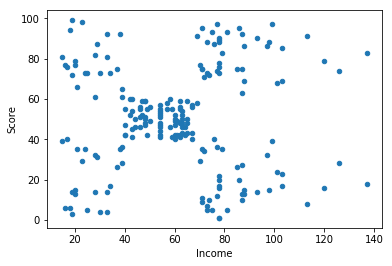

In [11]:
data.plot.scatter(x='Income', y = 'Score')

In [12]:
from sklearn.model_selection import train_test_split
X=data[['Score','Age','Income']]
Y=data['Gender']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('test:',logreg.score(X_test,y_test))
print('train:',logreg.score(X_train,y_train))

test: 0.54
train: 0.5733333333333334


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('test:',dt.score(X_test,y_test))
print('train:',dt.score(X_train,y_train))

test: 0.6
train: 1.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('test:',knn.score(X_test,y_test))
print('train:',knn.score(X_train,y_train))

test: 0.56
train: 0.68


In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC()
clf.fit(X_train,y_train)
print('test:',clf.score(X_test,y_test))
print('train:',clf.score(X_train,y_train))

test: 0.52
train: 1.0


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
def group_age(age):
    if age <= 30:
        return "<= 30"
    elif age <= 40:
        return "31-40"
    elif age<= 50:
        return "41-50"
    elif age<= 60:
        return "51-60"
    else:
        return "61-70"

In [20]:
data["Age"]= data.Age.apply(group_age)


In [21]:
data["Age"].value_counts()

<= 30    62
31-40    60
41-50    38
51-60    23
61-70    17
Name: Age, dtype: int64

In [22]:
data

,ID,Gender,Age,Income,Score
0,1,1,<= 30,15,39
1,2,1,<= 30,15,81
2,3,0,<= 30,16,6
3,4,0,<= 30,16,77
4,5,0,31-40,17,40
5,6,0,<= 30,17,76
6,7,0,31-40,18,6
7,8,0,<= 30,18,94
8,9,1,61-70,19,3
9,10,0,<= 30,19,72


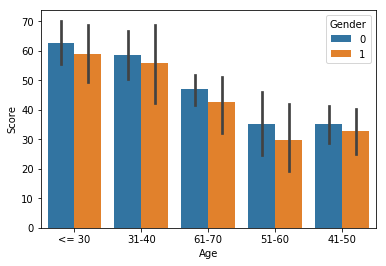

In [23]:
sns.barplot(x = 'Age', y = "Score", hue = "Gender", data = data,)

In [24]:
data.groupby(["Gender","Age"]).mean()

ID     Income      Score
Gender Age                                    
0      31-40  113.428571  66.057143  58.714286
       41-50   97.520000  61.280000  35.160000
       51-60   98.000000  58.833333  35.083333
       61-70   81.166667  53.333333  47.166667
       <= 30   84.000000  51.941176  62.735294
1      31-40  126.800000  72.240000  55.800000
       41-50  119.461538  68.076923  32.923077
       51-60   86.000000  54.363636  29.727273
       61-70   71.909091  48.181818  42.545455
       <= 30   96.892857  59.178571  58.964286